In [36]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing 
%matplotlib inline

In [37]:
df = pd.read_csv('book1.csv')

In [38]:
df.columns

Index(['Date', 'Regions', 'City', 'دائرة الوقعة', 'location_of_the_incident',
       'نوع مكان العمل', 'type_of_incident', 'suicide_method',
       'سبب الوفاة  او الاصابة وفقا للمصادر', 'cause_of_suicide',
       'خلفية الsuicide', 'الاسم', 'Age_class', 'Age', 'Gender', 'Nationality',
       'الفئة الوظيفية', 'Job', 'المستشفي او المشرحة المستقبلة للحاااة',
       'رقم official للواقعة', 'ملاحظات', 'تفاصيل الخبر', 'Source'],
      dtype='object')

In [39]:
df = df.filter(['Date', 'Regions', 'City','location_of_the_incident', 'type_of_incident', 'suicide_method',
                    'cause_of_suicide', 'Age_class', 'Age', 'Gender', 'Nationality','Job', 'Source'],axis=1)

In [40]:
df.head()

,Date,Regions,City,location_of_the_incident,type_of_incident,suicide_method,cause_of_suicide,Age_class,Age,Gender,Nationality,Job,Source
0,08-01-11,Canal Cities,Ismailia,inside_his_residence,attempted_suicide,set_fire_to_the_body,family_or_marital_disputes,mature,36,male,egyptian,apartment_broker,official
1,08-01-11,Border Cities,Red_Sea,inside_his_residence,suicide,hanged,financial_crisis,mature,56,female,german,unavailable,official
2,09-01-11,Border Cities,Red_Sea,inside_his_residence,attempted_suicide,ingestion_of_toxic_substance,unavailable,mature,19,male,egyptian,unavailable,official
3,11-01-11,Delta Cities,Menoufia,inside_his_residence,suicide,with_firearm,psychological_crisis,mature,36,male,egyptian,police_officer,official
4,11-01-11,Canal Cities,Ismailia,on_the_road,attempted_suicide,with_firearm,psychological_crisis,mature,30,male,egyptian,police_sergeant,official


In [41]:
df.shape

(1746, 13)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      1746 non-null   object
 1   Regions                   1746 non-null   object
 2   City                      1746 non-null   object
 3   location_of_the_incident  1746 non-null   object
 4   type_of_incident          1746 non-null   object
 5   suicide_method            1746 non-null   object
 6   cause_of_suicide          1746 non-null   object
 7   Age_class                 1746 non-null   object
 8   Age                       1746 non-null   int64 
 9   Gender                    1746 non-null   object
 10  Nationality               1746 non-null   object
 11  Job                       1746 non-null   object
 12  Source                    1746 non-null   object
dtypes: int64(1), object(12)
memory usage: 177.5+ KB


In [43]:
df['Date'] = pd.to_datetime(df['Date'])

In [44]:
df.City.value_counts().values

array([334, 230, 117, 111,  87,  86,  85,  79,  79,  71,  68,  66,  52,
        45,  40,  34,  30,  25,  22,  20,  13,  12,  11,  10,   9,   5,
         5], dtype=int64)

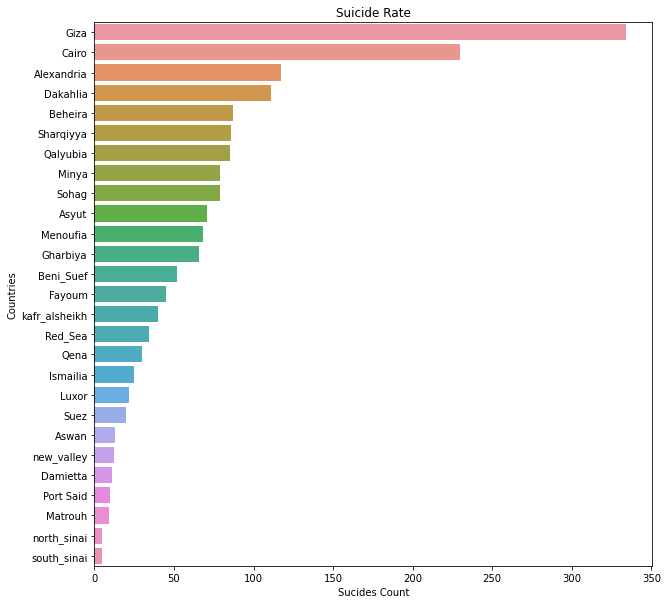

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(y=df.City.value_counts().index, x=df.City.value_counts().values)
plt.xlabel('Sucides Count')
plt.ylabel('Countries')
plt.title('Suicide Rate')
plt.show()

In [46]:
suicideGender=df.groupby(['City','Gender']).size()
suicideGender

City           Gender
Alexandria     female     42
               male       75
Aswan          female      4
               male        9
Asyut          female     18
               male       53
Beheira        female     27
               male       60
Beni_Suef      female     15
               male       37
Cairo          female     70
               male      160
Dakahlia       female     34
               male       77
Damietta       female      3
               male        8
Fayoum         female     17
               male       28
Gharbiya       female     14
               male       52
Giza           female     95
               male      239
Ismailia       female      5
               male       20
Luxor          female      6
               male       16
Matrouh        female      2
               male        7
Menoufia       female     16
               male       52
Minya          female     25
               male       54
Port Said      female      4
               male  

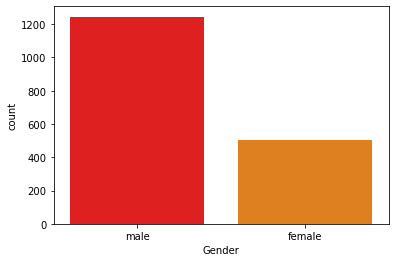

In [47]:
sns.countplot(df.Gender)
plt.show()

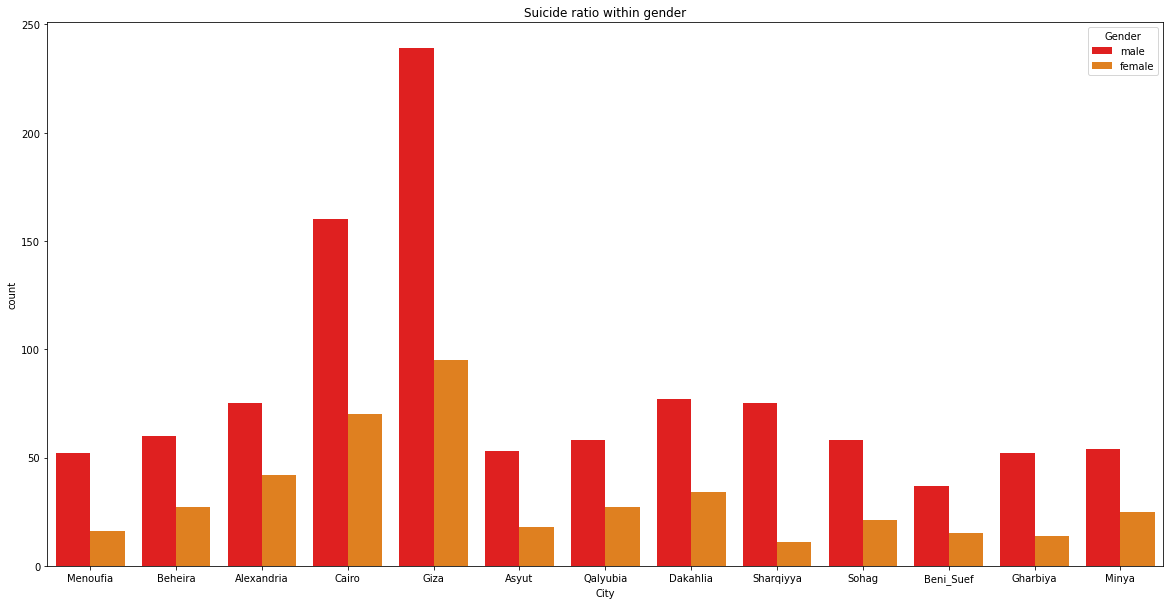

In [48]:
half = df.loc[df['City'].isin(df.City.value_counts().index[:13])]
plt.figure(figsize=(20,10))
sns.countplot(half.City,hue=half.Gender)
plt.title('Suicide ratio within gender')
plt.show()

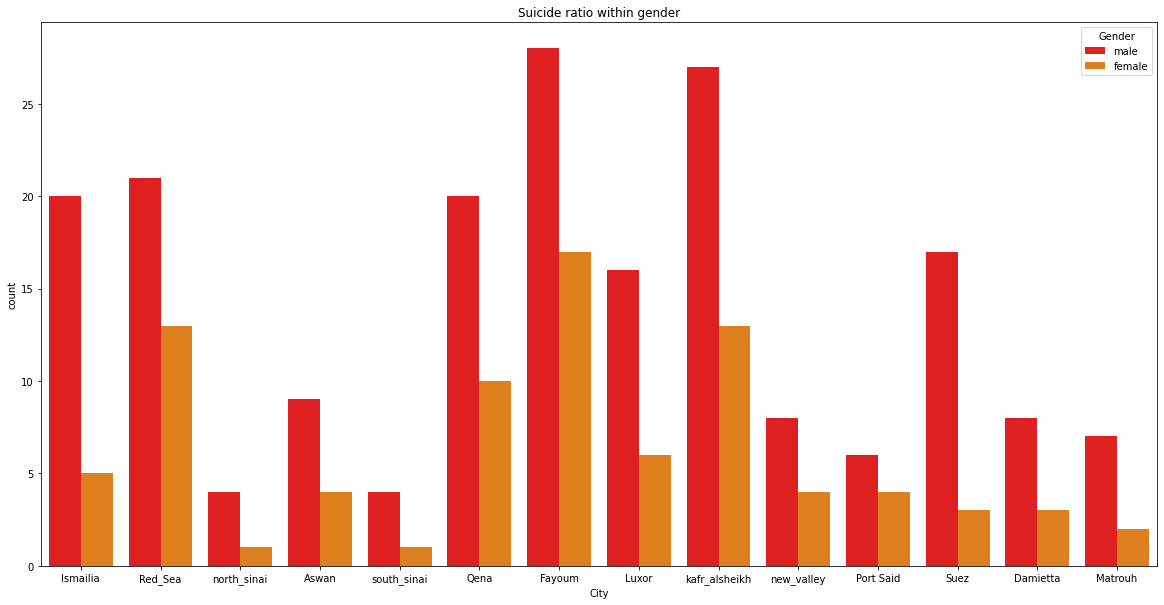

In [49]:
another_half = df.loc[df['City'].isin(df.City.value_counts().index[13:])]
plt.figure(figsize=(20,10))
sns.countplot(another_half.City,hue=another_half.Gender)
plt.title('Suicide ratio within gender')
plt.show()

In [50]:
df.head()

,Date,Regions,City,location_of_the_incident,type_of_incident,suicide_method,cause_of_suicide,Age_class,Age,Gender,Nationality,Job,Source
0,2011-08-01,Canal Cities,Ismailia,inside_his_residence,attempted_suicide,set_fire_to_the_body,family_or_marital_disputes,mature,36,male,egyptian,apartment_broker,official
1,2011-08-01,Border Cities,Red_Sea,inside_his_residence,suicide,hanged,financial_crisis,mature,56,female,german,unavailable,official
2,2011-09-01,Border Cities,Red_Sea,inside_his_residence,attempted_suicide,ingestion_of_toxic_substance,unavailable,mature,19,male,egyptian,unavailable,official
3,2011-11-01,Delta Cities,Menoufia,inside_his_residence,suicide,with_firearm,psychological_crisis,mature,36,male,egyptian,police_officer,official
4,2011-11-01,Canal Cities,Ismailia,on_the_road,attempted_suicide,with_firearm,psychological_crisis,mature,30,male,egyptian,police_sergeant,official


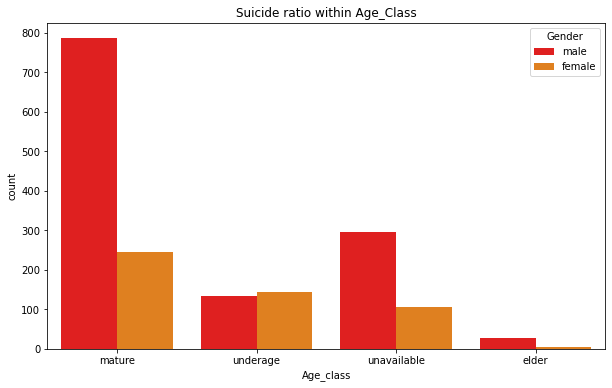

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(df.Age_class,hue=df.Gender)
plt.title('Suicide ratio within Age_Class')
plt.show()

In [52]:
df.head()

,Date,Regions,City,location_of_the_incident,type_of_incident,suicide_method,cause_of_suicide,Age_class,Age,Gender,Nationality,Job,Source
0,2011-08-01,Canal Cities,Ismailia,inside_his_residence,attempted_suicide,set_fire_to_the_body,family_or_marital_disputes,mature,36,male,egyptian,apartment_broker,official
1,2011-08-01,Border Cities,Red_Sea,inside_his_residence,suicide,hanged,financial_crisis,mature,56,female,german,unavailable,official
2,2011-09-01,Border Cities,Red_Sea,inside_his_residence,attempted_suicide,ingestion_of_toxic_substance,unavailable,mature,19,male,egyptian,unavailable,official
3,2011-11-01,Delta Cities,Menoufia,inside_his_residence,suicide,with_firearm,psychological_crisis,mature,36,male,egyptian,police_officer,official
4,2011-11-01,Canal Cities,Ismailia,on_the_road,attempted_suicide,with_firearm,psychological_crisis,mature,30,male,egyptian,police_sergeant,official


In [53]:
df.City.nunique()

27

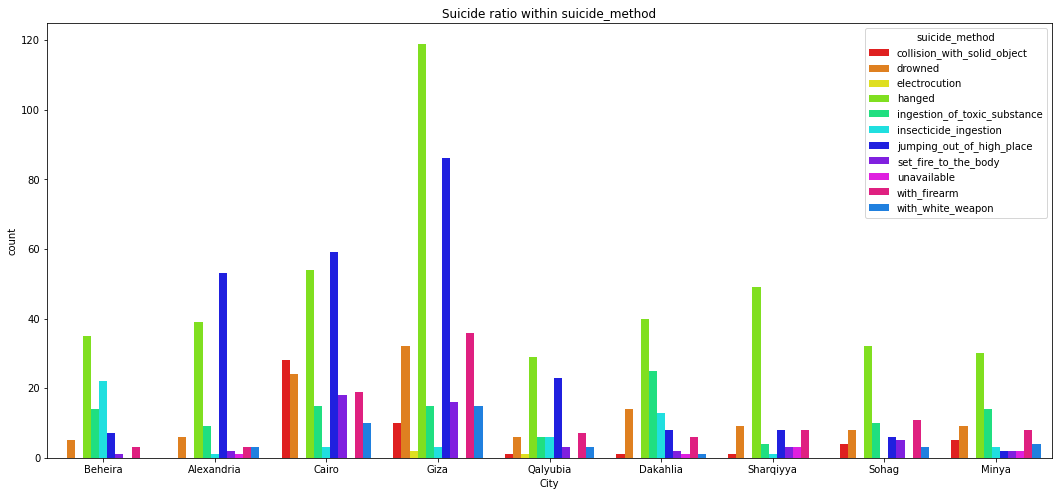

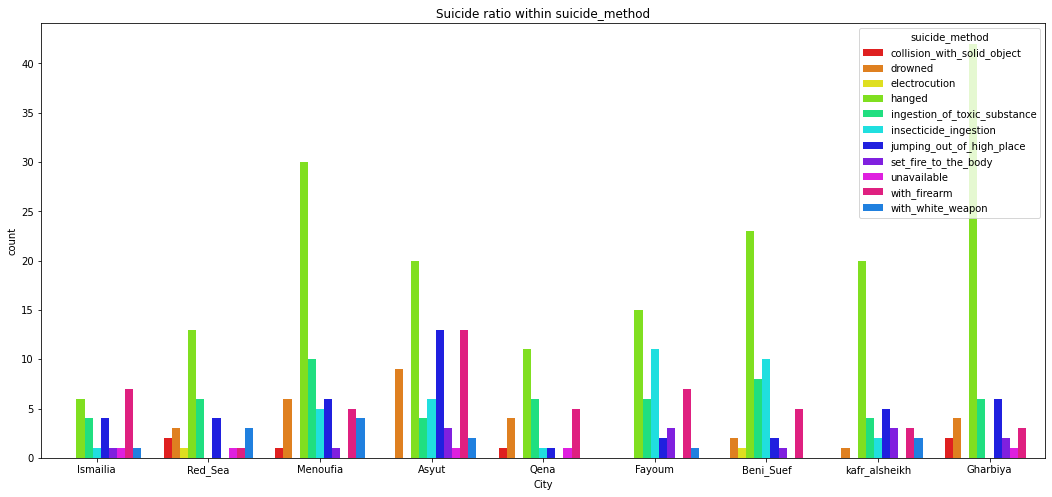

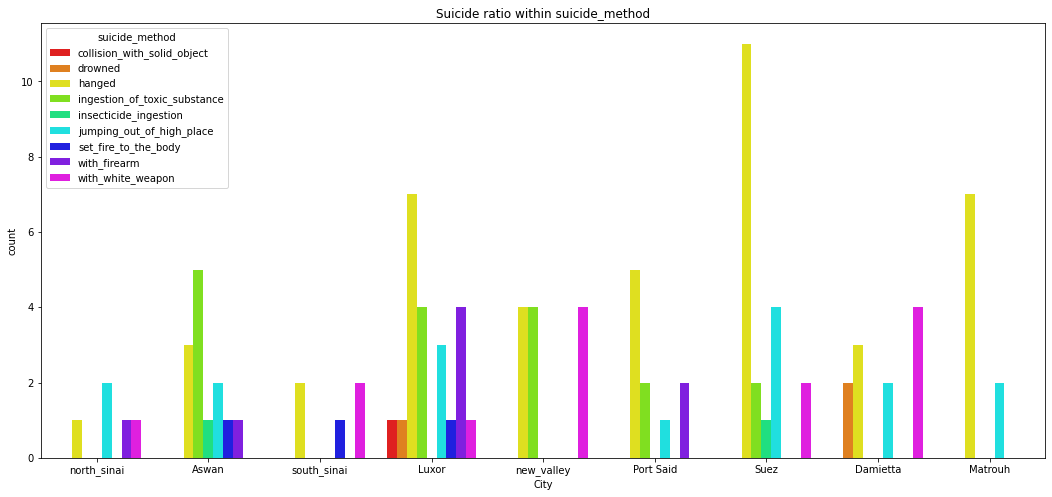

In [58]:
x1 = df.loc[df['City'].isin(df.City.value_counts().index[:9])]
x2 = df.loc[df['City'].isin(df.City.value_counts().index[9:18])]
x3 = df.loc[df['City'].isin(df.City.value_counts().index[18:])]
colors = ['#ff0000', '#ff8000','#ffff00','#80ff00','#00ff80','#00ffff','#0000ff','#8000ff','#ff00ff','#ff0080','#0080ff','#00ff00']
for i in (x1,x2,x3):
    plt.figure(figsize=(18,8))
    customPalette = sns.set_palette(sns.color_palette(colors))
    sns.countplot(i.City,hue=i.suicide_method.sort_values(), palette=customPalette)
    plt.title('Suicide ratio within suicide_method')
    plt.show()

**as we can see the most sucide methods is hanging**

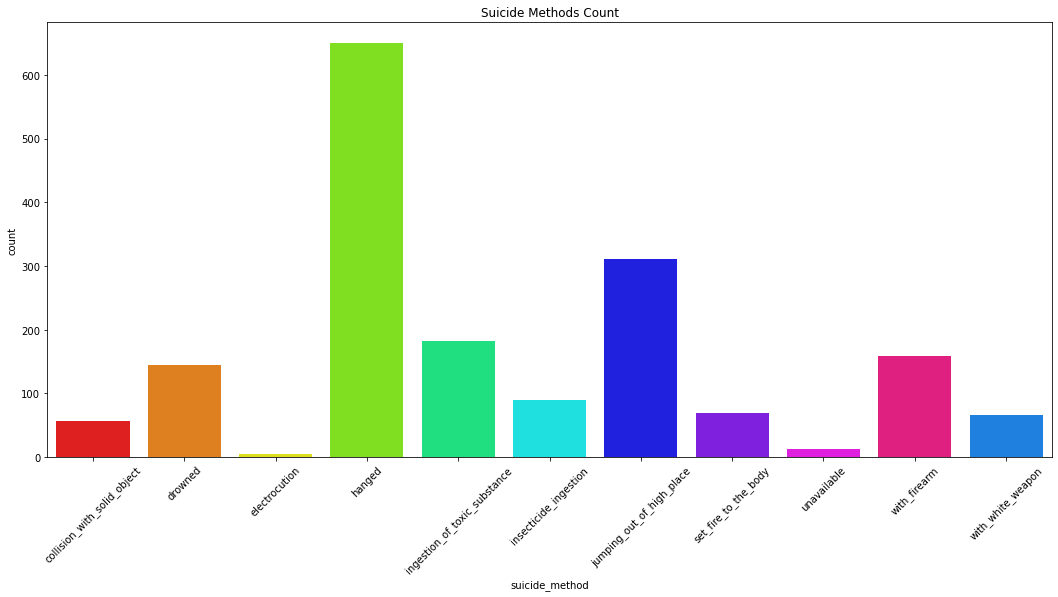

In [56]:
plt.figure(figsize=(18,8))
sns.countplot('suicide_method',data=df.sort_values('suicide_method'))
plt.title('Suicide Methods Count')
plt.tick_params(axis='x', rotation=45)
plt.show()